In [3]:
import pandas as pd
red_wine = pd.read_csv('data/winequality-red.csv',sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine = red_wine[['alcohol', 'residual sugar','pH']]
red_wine.rename(columns={'residual sugar' : 'sugar'},inplace=True)
red_wine['class'] = 0
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  1599 non-null   float64
 1   sugar    1599 non-null   float64
 2   pH       1599 non-null   float64
 3   class    1599 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 50.1 KB


In [6]:
white_wine = white_wine[['alcohol','residual sugar','pH']]
white_wine.rename(columns = {'residual sugar' : 'sugar'},inplace = True)
white_wine['class'] = 1
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  4898 non-null   float64
 1   sugar    4898 non-null   float64
 2   pH       4898 non-null   float64
 3   class    4898 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 153.2 KB


In [7]:
# 레드와인 데이터와 화이트와인 데이터 합치기
wine = pd.concat([red_wine, white_wine])  #=>데이터 위아래로 합침
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


# **1.Decision Tree**
- 결정 트리에서는 각 분할을 고려할 때 **불순도를 최소화**하는 방향으로 분할을 진행
- 각 분할 후 Gini Index를 계산하여 불순도가 가장 적은 분할을 선택
- 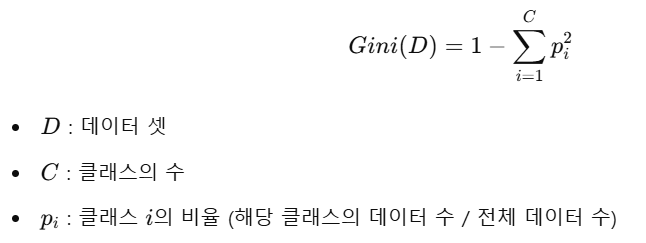

### 1-1. 데이터셋 생성

In [8]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

### 1-2. 훈련데이터와 검증데이터 분리

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

### 1-3. 데이터 전처리

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# 1. scaler 생성
# 2. 학습 데이터에 대해 fit
# 3. 학습 데이터에 대해 transform
# 4. 학습데이터를 스케일링한 scaler로 테스트 데이터도 transform (fit은 하지 않음!)

### 1-4. DecisionTree 모델 적합

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 50)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9971264367816092
0.8763076923076923


<function matplotlib.pyplot.show(close=None, block=None)>

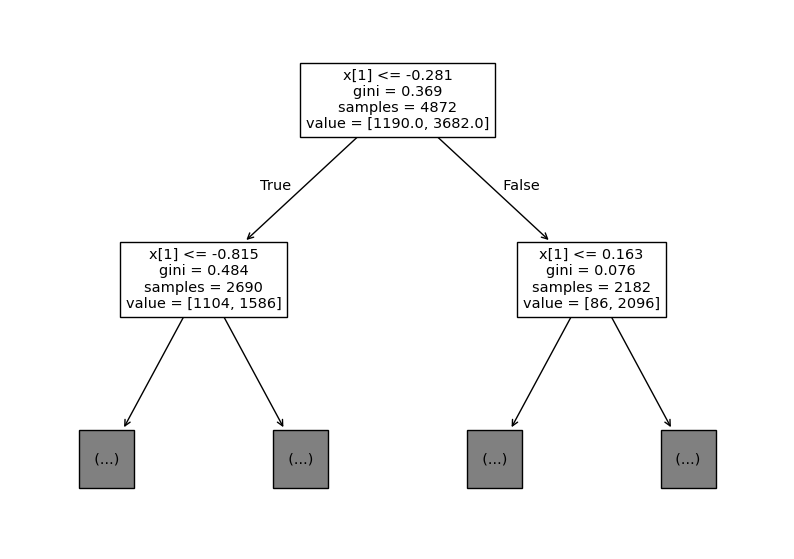

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1)
plt.show

# **2. Training set, Validation set, Test set**
- 1. 훈련세트에서 모델 훈련하고 검증세트로 평가하기
- 2. 최적의 모델을 선택하고 훈련세트와 검증세트를 합친 전체 세트로 모델 학습하기
- 3. 테스트세트를 이용하여 최종점수 평가

### 2-1. 훈련세트와 테스트세트 생성

In [16]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

### 2-2. 훈련세트를 훈련세트와 검증세트로 분리하기
- 훈련세트 : sub_input
- 검증세트: val_input

In [19]:
sub_input, val_input, sub_target, val_target= train_test_split(train_input, train_target)

### 2-3. 훈련세트를 이용해 모델적합한 후 테스트세트로 스코어 내기

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input, test_target))

0.9980842911877394
0.8530377668308703
0.8406153846153847


# **3. K-fold CV**
- 데이터를 K개로 균등 분할
- 한 개의 폴드를 검증 데이터로 사용, 나머지(K-1개)로 training
- 모든 폴드에 대해 반복(K번)
- 각 Fold의 MSE 평균을 사용

In [26]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
# dt : DecisionTreeClassifier
# 직접 훈련세트와 검증세트를 분리하지 않는다
print(scores) #교차검증의 최종 점수는 test_score에 있는 5개의 평균
# 'test score'는 k-fold cv에서 자체적으로 선택한 검증셋의 점수, 테스트셋 아님!!!

{'fit_time': array([0.00627565, 0.00611377, 0.00653887, 0.00800037, 0.00804543]), 'score_time': array([0.00233912, 0.00262237, 0.00232887, 0.00336671, 0.00207758]), 'test_score': array([0.85538462, 0.85538462, 0.85626283, 0.85626283, 0.85318275])}


### 3-1. GridSerchCV
- 최적의 하이퍼파라미터 탐색 & 교차검증을 한번에 수행

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004]
}
# min_impurity_decrease=0.01 (불순도 감소가 0.01 이상일 때만 분할)

In [29]:
gs = GridSearchCV(dt, params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004]})

In [32]:
gs.best_estimator_

DecisionTreeClassifier(min_impurity_decrease=0.0002)

불순도 감소 = 0.0002가 최적의 하이퍼파라미터

# **Ensemble**
- 여러 모델의 결과를 결합하여 최종 결과를 도출하는 것
- 일반적으로 개별모델보다 성능이 좋다
- RandomForest, Extra Tree, Gradient Boosting
- RandomForest : 부트스트랩을 통해 여러개의 훈련데이터를 만들고, 전체 특성 개수의 제곱근만큼의 특성을 선택해서 최적의 분할을 선택한다
- Extra Tree: 전체 훈련데이터를 사용하여, 무작위로 특성을 선택해서 분할
- Gradient Boosting:  약한 모델을 순차적으로 학습시키고, 이전 모델의 예측 오류를 보완하는 방식으로 진행된다


# **4. Random Forest**

### 4-1. 부트스트랩
- 전체 데이터에서 복원추출을 통해 여러개의 훈련데이터를 만드는 것
- 노드를 분류할 때 전체 특성 개수의 제곱근만큼의 특성을 선택한다

In [35]:
import pandas as pd
df = pd.read_csv('https://bit.ly/wine_csv_data')
data = df[['alcohol','sugar', 'pH']]
target = df[['class']]

In [39]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

### 4-2. 교차검증을 통해 RandomForest score 계산

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_jobs= -1)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs=1)

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [38]:
print(scores)

{'fit_time': array([0.13356423, 0.13583326, 0.14476848, 0.14404869, 0.14993668]), 'score_time': array([0.0285182 , 0.02720332, 0.02851987, 0.02847624, 0.0287869 ]), 'test_score': array([0.87589744, 0.88205128, 0.89322382, 0.86858316, 0.89425051]), 'train_score': array([0.9966641 , 0.99820375, 0.99769112, 0.99743458, 0.99640841])}


### 4-3. 랜덤 포레스트의 특성중요도

In [43]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)
#[['alcohol', 'sugar', 'pH']] => sugar의 중요도가 가장 높다고 판단

[0.23213674 0.5002391  0.26762416]


C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 4-4. OOB를 검증 세트로 활용

In [46]:
rf = RandomForestClassifier(oob_score = True, n_jobs=-1)
rf.fit(train_input, train_target)
rf.oob_score_

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8920361247947455

# **5. Extra Tree**

### 랜덤포레스트와 차이
- 트리 분할 방식:

- 랜덤포레스트: 각 트리에서 분할을 할 때, 노드를 분할하는 특성의 최적값을 선택. 모든 특성에 대해 가능한 분할을 계산하고 그 중 최적의 분할을 선택.
- 엑스트라 트리: 트리 분할 시, 무작위로 선택한 특성과 임계값을 기반으로 분할을 수행.  최적의 분할을 찾지 않고 무작위로 분할을 하기 때문에 더 빠르게 학습.

- 랜덤포레스트: 부트스트랩 사용

- 엑스트라트리: 전체 훈련세트 사용

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1)
scores = cross_validate(et, train_input, train_target, return_train_score = True)
print(scores)

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

{'fit_time': array([0.11699986, 0.11279011, 0.10738349, 0.10499263, 0.11349463]), 'score_time': array([0.02831674, 0.02712154, 0.02816463, 0.02719069, 0.02826667]), 'test_score': array([0.88717949, 0.88717949, 0.88398357, 0.88911704, 0.88809035]), 'train_score': array([0.99717732, 0.99717732, 0.99717804, 0.99717804, 0.99794767])}


C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# **6. Gradient Boosting**
- 목적:
- **그래디언트 부스팅**은 여러 모델을 결합하여 예측 성능을 향상시키는 앙상블 방법입니다.
- **경사하강법**은 단일 모델의 파라미터를 최적화하는 최적화 알고리즘입니다.

- 사용하는 방식:
- 그래디언트 부스팅은 오류를 줄이기 위해 **순차적으로 모델을 학습**시킵니다.
- 경사하강법은 모델의 가중치를 조정하여 **손실함수의 값을 최소화**하는 방식으로 사용됩니다

- 첫 번째 모델을 학습시킨 후, 그 모델의 예측값과 실제 값의 차이(오차)를 계산합니다.
- 두 번째 모델은 첫 번째 모델이 잘못 예측한 부분에 더 중점을 두고 학습됩니다.
- 이 과정을 반복하여 모델을 개선하며, 각 모델의 예측을 합쳐 최종 예측을 만듭니다.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500) #n_estimator= 트리의 개수를 지정한다
scores = cross_validate(gb, train_input, train_target, return_train_score=True)
print(scores)

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array w

{'fit_time': array([0.9943347 , 1.02052212, 0.99490738, 0.99082637, 0.99223089]), 'score_time': array([0.0074296 , 0.00907063, 0.00718832, 0.00720763, 0.00714278]), 'test_score': array([0.8625641 , 0.87076923, 0.87371663, 0.87577002, 0.87782341]), 'train_score': array([0.92019502, 0.91788555, 0.91944587, 0.91893279, 0.91893279])}


# **7. Histogram Gradient Boosting**
- 데이터의 특성 값들을 256개의 구간으로 나누어(히스토그램) 각 구간에 대해 최적의 분할을 찾는 방식입니다.

In [52]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
scores = cross_validate(hgb, train_input, train_target, return_train_score = True)
print(scores)

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

{'fit_time': array([0.23615599, 0.15548277, 0.16027069, 0.15884399, 0.16941047]), 'score_time': array([0.00705266, 0.00622702, 0.00602889, 0.00676417, 0.00705147]), 'test_score': array([0.88      , 0.88102564, 0.88295688, 0.88295688, 0.88295688]), 'train_score': array([0.92763664, 0.92917629, 0.93201642, 0.92996408, 0.92868138])}
